In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
# Defining some constants
c=3*10**8; # m s^-1
h=6.62607015*10**(-34); # m^2 kg s^-1
pi=np.pi;
k=1.380649*10**(-23) # m^2 kg s^-2 K^-1

In [184]:
# File opening
file=open("COBE_temperature_data.txt",'r');
s=file.readlines();

# Data arrays

freq=[];
spect=[];
uncer=[];

#Filling the data vectors
for i in s:
    freq.append(float(i.split()[0]));
    spect.append(float(i.split()[1]));
    uncer.append(float(i.split()[3]));

In [194]:
# Unit conversion 
freqc=[]; #Converted frequency 
spectc=[];
uncerc=[];
for i in range (0,len(freq),1):
    freqc.append(freq[i]*100); # 1/cm to 1/m
    spectc.append(spect[i]*10**(-26)*10**6); # 1 Jansky = 10^-26 Joules s^-1 m^-2, 1 Mega =10^6
    uncerc.append(uncer[i]*10**(-26)*10**6); # Same conversion as spect but with KJk

In [202]:
# Frequency array 
v=np.linspace(227.0,2133.0,num=len(freqc));

#Temperature 
T=3;

# Spectrum array 
u=[];

for i in v:
    u.append(8*pi*i**3/(c**3*(np.exp(h*i/(k*T))-1)));

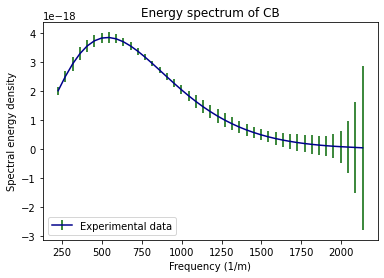

In [204]:
Fig1=plt.figure(1);
plt.errorbar(freqc,spectc,color="darkblue",label="Experimental data",xerr=None,yerr=uncerc,ecolor="darkgreen");
#plt.plot(v,u,color="darkred",label="Prediction");
plt.xlabel('Frequency (1/m)');
plt.ylabel("Spectral energy density");
plt.legend(loc="lower left");
plt.title("Energy spectrum of CB");
plt.show(Fig1);

In [188]:
file.close()